In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

# Function

In [5]:
def foo(x):
    return x*np.sin(10*x)

# RBFs

In [2]:
def gaussian(r, eps):
    return np.exp(-eps*r**2)

def phs3(r):
    return r**3

In [49]:
n = 15
epsilons = np.linspace(.001, 100, 1000)
errors = []
conds = []

for eps in epsilons:
    rbf = lambda r: gaussian(r, eps)
    
    xs = np.linspace(0,1,n)
    fs = foo(xs)
    A = rbf(np.abs(np.subtract.outer(xs,xs)))
    conds.append(la.cond(A))
    cs = la.solve(A,fs)
    
    zs = np.linspace(0,1,10*n)
    ss = rbf(np.abs(np.subtract.outer(zs,xs)))@cs
    
    errors.append(la.norm(ss-foo(zs))/la.norm(foo(zs)))
    

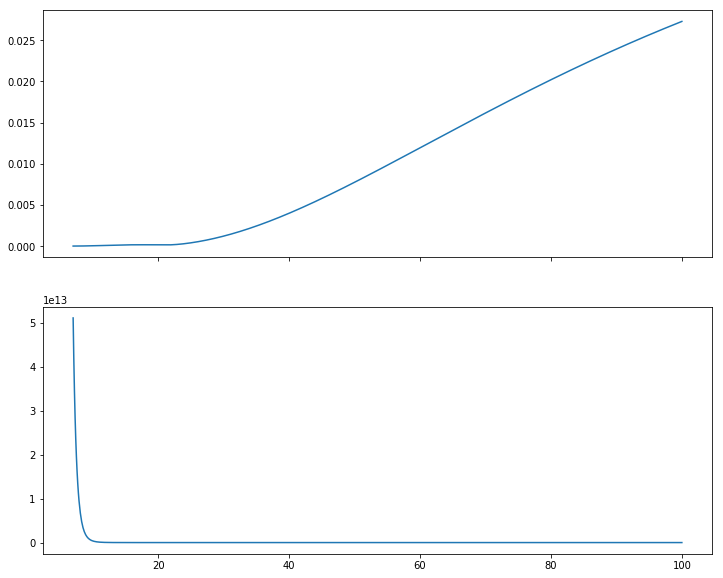

In [84]:
skip = 70
fig, ax = plt.subplots(2, sharex=True, figsize=(12,10))
#ax[0].ylim(0,.1)
#ax[0].xlim(0,60)
ax[0].plot(epsilons[skip:], errors[skip:])
#ax[1].ylim(0,10**16)
ax[1].plot(epsilons[skip:], conds[skip:])

In [87]:
epsilons[70]

7.007936936936938

In [88]:
errors[70]

2.250284253815835e-06